### **Importing libs**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, Model
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import ResNet152V2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

### **Visualization**

In [ ]:
def visualize(dir, num_imgs=5):
  fig, axes = plt.subplots(1, num_imgs, figsize=(20, 20))
  
  for i, img in enumerate(os.listdir(dir)[:num_imgs]):
    img = load_img(f"{dir}/{img}")
    img_arr = img_to_array(img)
    axes[i].imshow(img_arr.astype(np.uint8)) 

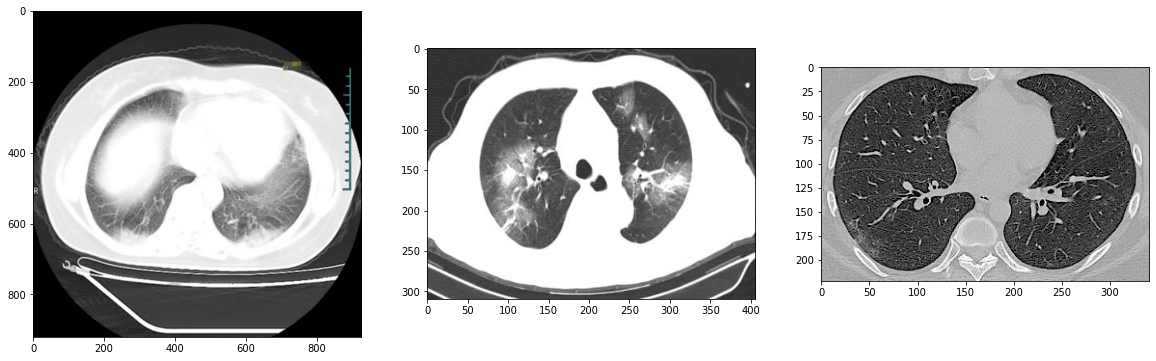

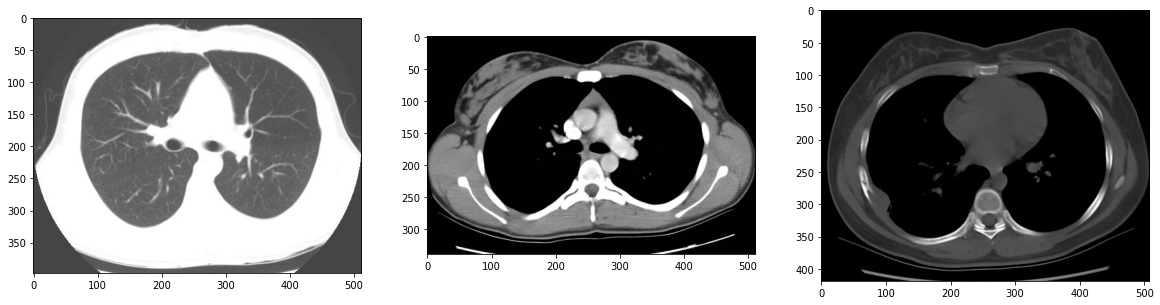

In [ ]:
directory = "/content/drive/MyDrive/Colab Notebooks/COVID_data/ct_data/"

visualize(f"{directory}train/COVID", 3)
visualize(f"{directory}train/non-COVID", 3)

### **Train and test datasets**

In [ ]:
print(len(os.listdir(f"{directory}train/COVID")), len(os.listdir(f"{directory}train/non-COVID")))
print(len(os.listdir(f"{directory}test/COVID")), len(os.listdir(f"{directory}test/non-COVID")))

1000 1000
214 252


In [4]:
TARGET_SIZE = (256, 256)

train_gen = ImageDataGenerator(rescale=1. / 255, 
                               horizontal_flip=True, 
                               vertical_flip=True, 
                               zoom_range=0.2)
test_gen = ImageDataGenerator(rescale=1. / 255)

train_ds = train_gen.flow_from_directory(f"{directory}train", class_mode="binary", target_size=TARGET_SIZE)
test_ds = test_gen.flow_from_directory(f"{directory}test", class_mode="binary", target_size=TARGET_SIZE)

NameError: name 'directory' is not defined

### **Creating and fitting model**

In [3]:
resnet = ResNet152V2(include_top=False, weights="imagenet", input_shape=(*TARGET_SIZE, 3))

for layer in resnet.layers:
  layer.trainable = False

NameError: name 'TARGET_SIZE' is not defined

In [ ]:
x = layers.Flatten()(resnet.output)
x = layers.Dense(512, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x) 

In [ ]:
def decay_scheduler(epoch):
  initial_lr = 0.01
  decay = 1
  return initial_lr * 1 / (1 + decay * epoch)

In [ ]:
model = Model(inputs=resnet.input, outputs=predictions)

In [ ]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=[metrics.Precision(), metrics.Recall()])

In [ ]:
history = model.fit(train_ds, 
          validation_data=test_ds,
          epochs=200, 
          callbacks=[LearningRateScheduler(decay_scheduler), 
                     EarlyStopping(patience=10)], 
          workers=4)

Epoch 1/200
63/63 [==============================] - 36s 541ms/step - loss: 0.1172 - precision: 0.9643 - recall: 0.9450 - val_loss: 0.5513 - val_precision: 0.8062 - val_recall: 0.9246
Epoch 2/200
63/63 [==============================] - 35s 537ms/step - loss: 0.1346 - precision: 0.9491 - recall: 0.9510 - val_loss: 0.4997 - val_precision: 0.8683 - val_recall: 0.8373
Epoch 3/200
63/63 [==============================] - 36s 532ms/step - loss: 0.1018 - precision: 0.9688 - recall: 0.9640 - val_loss: 0.4752 - val_precision: 0.8690 - val_recall: 0.8690
Epoch 4/200
63/63 [==============================] - 36s 534ms/step - loss: 0.1261 - precision: 0.9534 - recall: 0.9610 - val_loss: 0.4994 - val_precision: 0.8617 - val_recall: 0.8651
Epoch 5/200
63/63 [==============================] - 35s 538ms/step - loss: 0.1114 - precision: 0.9647 - recall: 0.9570 - val_loss: 0.5370 - val_precision: 0.8315 - val_recall: 0.9008
Epoch 6/200
63/63 [==============================] - 35s 530ms/step - loss: 0.10

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f64cf881a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 8/200
11/63 [====>.........................] - ETA: 22s - loss: 0.1165 - precision: 0.9783 - recall: 0.9474

KeyboardInterrupt: ignored

### **Saving and evaluating**

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/COVID_data/models/saved model/classification_model")

NameError: ignored

In [ ]:
model.evaluate(test_ds)

15/15 [==============================] - 3s 214ms/step - loss: 0.3235 - precision_1: 0.8514 - recall_1: 0.9325


[0.3235310912132263, 0.8514492511749268, 0.932539701461792]

Text(0.5, 0, 'epoch')

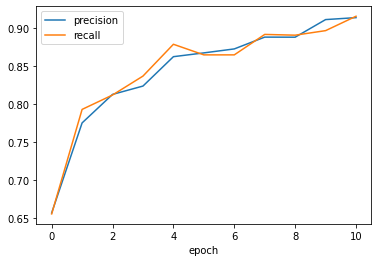

In [ ]:
plt.plot(history.history["precision_1"])
plt.plot(history.history["recall_1"])
plt.legend(["precision", "recall"])
plt.xlabel("epoch")

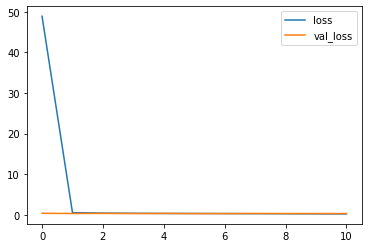

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])